# Solve Systems of Linear Equations
We analyze the solve times of different line euqation systems with numpy and scipy linsolv algorithms. For each one, the coefficients are a quadratic matrix and x is the independant variable we want to solve for:

$coefficents * x = dependants $

the coeffeicients matrix is one of 3 types, each one filled with random values:
- filled 
- tridiagonal 
- diagonal 

The possible linalg solvers are:
- numpy
- scipy
- scipy sparse

The tridiagonal and diagonal matrix are generated with scipy sparse. If scipy sparse is not selected as a solver, the array is transformed to a normal array.

In [2]:
import numpy as np
import scipy
import timeit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [32]:
def generate_matrix(matrix_size, matrix_kind="normal", sparse_format="csr"):
    """
    Generates a coefficient matrix of the given kind and size.
    """
    if matrix_kind == "normal":
        return np.random.rand(matrix_size, matrix_size)
    elif matrix_kind == "tridiagonal":
        diagonals = [
            np.random.rand(matrix_size),           # lower diagonal
            np.random.rand(matrix_size),           # main diagonal
            np.random.rand(matrix_size)            # upper diagonal
        ]
        return scipy.sparse.diags_array(
            diagonals, offsets=[-1, 0, 1], shape=(matrix_size, matrix_size), format=sparse_format
        )
    elif matrix_kind == "diagonal":
        diagonals = np.random.rand(matrix_size)
        return scipy.sparse.diags_array(
            diagonals, offsets=0, format=sparse_format
        )
    else:
        raise ValueError(f"Unknown matrix kind: '{matrix_kind}'")

def get_solver(solver_kind):
    """
    Returns the appropriate solver function for the given kind.
    """
    if solver_kind == "numpy":
        return np.linalg.solve
    elif solver_kind == "scipy":
        return scipy.linalg.solve
    elif solver_kind == "scipy sparse":
        return scipy.sparse.linalg.spsolve
    else:
        raise ValueError(f"Unknown solver kind: '{solver_kind}'")

def get_solve_time(matrix_size, solver_kind="numpy", matrix_kind="normal", sparse_format="csr"):
    """
    Measures the execution time for solving a system of linear equations with different matrix types and solvers.

    Parameters
    ----------
    matrix_size : int
        Size (rows and columns) of the square coefficient matrix.
    solver_kind : str
        One of 'numpy', 'scipy', or 'scipy sparse'.
    matrix_kind : str
        One of 'normal', 'tridiagonal', or 'diagonal'.
    sparse_format : str
        Format used for sparse matrix construction, e.g., 'csr', 'csc'.

    Returns
    -------
    float
        Minimum time in seconds from several runs.
    """
    repetitions = 5 # number of times the result should be repeated
    number = 1  # number of times the stmt should be called before the time is stopped.

    # Generate matrix and RHS
    A = generate_matrix(matrix_size, matrix_kind, sparse_format)
    b = np.random.rand(matrix_size, 1)

    # Estimate memory usage of A before conversion to dense
    if scipy.sparse.issparse(A):
        matrix_memory = A.data.nbytes
    else:
        matrix_memory = A.nbytes

    # Convert sparse to dense if necessary
    if solver_kind in ["numpy", "scipy"] and scipy.sparse.issparse(A):
        A = A.toarray()
    
    if not scipy.sparse.issparse(A) and solver_kind == "scipy sparse":
        return pd.NA, matrix_memory
    
    solver = get_solver(solver_kind)
    def stmt():
        solver(A, b)

    print(f"Calculating solve time for {matrix_size}x{matrix_size} {matrix_kind} matrix with {solver_kind} solver...")
    min_time = min(timeit.repeat(stmt=stmt, repeat=repetitions, number=number))

    print(f"Minimum:\t{min_time:.6f} s")
    return min_time, matrix_memory

get_solve_time(1000, solver_kind="numpy", matrix_kind="normal")
get_solve_time(1000, solver_kind="numpy", matrix_kind="tridiagonal")
get_solve_time(1000, solver_kind="numpy", matrix_kind="diagonal")

get_solve_time(1000, solver_kind="scipy", matrix_kind="normal")
get_solve_time(1000, solver_kind="scipy", matrix_kind="tridiagonal")
get_solve_time(1000, solver_kind="scipy", matrix_kind="diagonal")

get_solve_time(1000, solver_kind="scipy sparse", matrix_kind="normal")
get_solve_time(1000, solver_kind="scipy sparse", matrix_kind="tridiagonal")
_ = get_solve_time(1000, solver_kind="scipy sparse", matrix_kind="diagonal")

Calculating solve time for 1000x1000 normal matrix with numpy solver...
Minimum:	0.015549 s
Calculating solve time for 1000x1000 tridiagonal matrix with numpy solver...
Minimum:	0.012940 s
Calculating solve time for 1000x1000 diagonal matrix with numpy solver...
Minimum:	0.013451 s
Calculating solve time for 1000x1000 normal matrix with scipy solver...
Minimum:	0.045302 s
Calculating solve time for 1000x1000 tridiagonal matrix with scipy solver...
Minimum:	0.000494 s
Calculating solve time for 1000x1000 diagonal matrix with scipy solver...
Minimum:	0.000447 s
Calculating solve time for 1000x1000 tridiagonal matrix with scipy sparse solver...
Minimum:	0.000173 s
Calculating solve time for 1000x1000 diagonal matrix with scipy sparse solver...
Minimum:	0.000085 s


In [33]:
MIN_SIZE = 500
MAX_SIZE = 15000
STEP_SIZE = 1000
SOLVERS = ["numpy", "scipy", "scipy sparse"]
KINDS = ["normal", "tridiagonal", "diagonal"]

data = []
for size in range(MIN_SIZE, MAX_SIZE, STEP_SIZE):
    for solver in SOLVERS: 
        for kind in KINDS:
            solve_time, matrix_memory = get_solve_time(size, solver, kind)
            data.append((size, solver, kind, solve_time, matrix_memory / 1024**2))

# Convert list to a DataFrame with appropriate column names
results = pd.DataFrame(data, columns=["Matrix Size", "Solver", "Matrix Kind", "Computation Time (seconds)", "Matrix Memory (MB)"])

results.to_csv("solve_times.csv")

Calculating solve time for 500x500 normal matrix with numpy solver...
Minimum:	0.002497 s
Calculating solve time for 500x500 tridiagonal matrix with numpy solver...
Minimum:	0.002069 s
Calculating solve time for 500x500 diagonal matrix with numpy solver...
Minimum:	0.001990 s
Calculating solve time for 500x500 normal matrix with scipy solver...
Minimum:	0.014568 s
Calculating solve time for 500x500 tridiagonal matrix with scipy solver...
Minimum:	0.000154 s
Calculating solve time for 500x500 diagonal matrix with scipy solver...
Minimum:	0.000119 s
Calculating solve time for 500x500 tridiagonal matrix with scipy sparse solver...
Minimum:	0.000092 s
Calculating solve time for 500x500 diagonal matrix with scipy sparse solver...
Minimum:	0.000044 s
Calculating solve time for 1500x1500 normal matrix with numpy solver...
Minimum:	0.041833 s
Calculating solve time for 1500x1500 tridiagonal matrix with numpy solver...
Minimum:	0.039492 s
Calculating solve time for 1500x1500 diagonal matrix wit

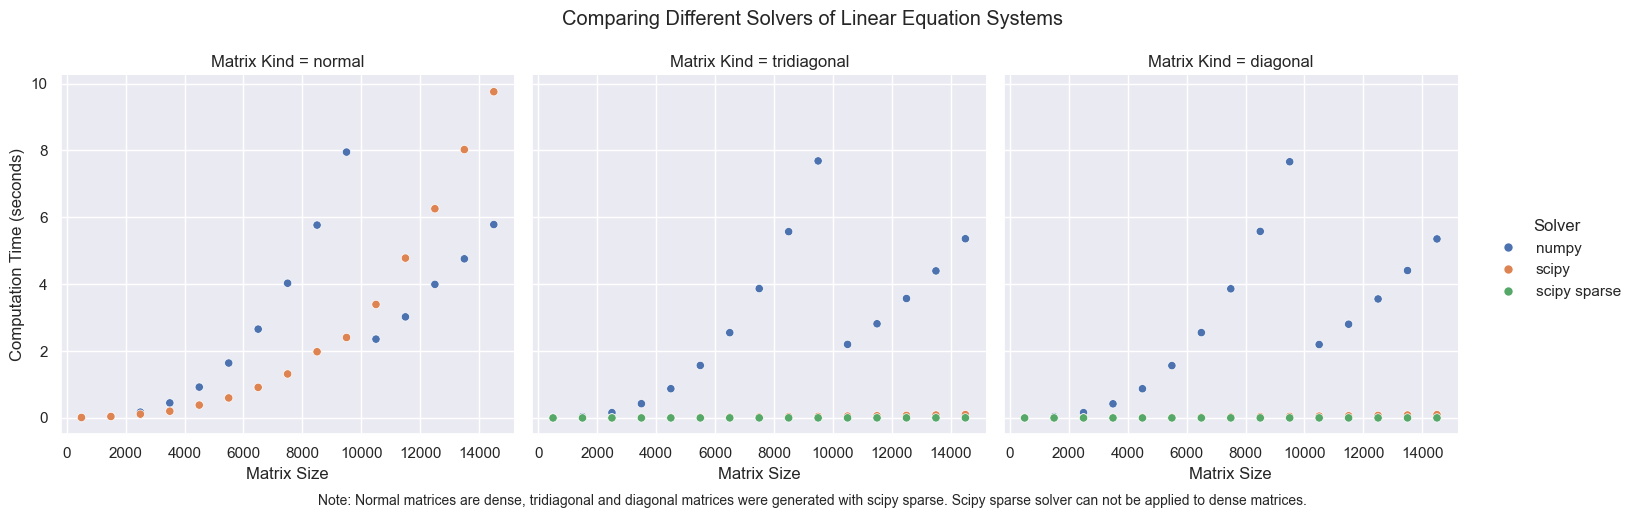

In [38]:
results = pd.read_csv("solve_times.csv")
g = sns.relplot(data=results, kind="scatter", x="Matrix Size", y="Computation Time (seconds)", hue="Solver", col="Matrix Kind")
g.figure.suptitle("Comparing Different Solvers of Linear Equation Systems")
g.figure.text(0.5, -0.01, "Note: Normal matrices are dense, tridiagonal and diagonal matrices were generated with scipy sparse. Scipy sparse solver can not be applied to dense matrices.", 
           ha='center', fontsize=10)
g.tight_layout()
plt.show()

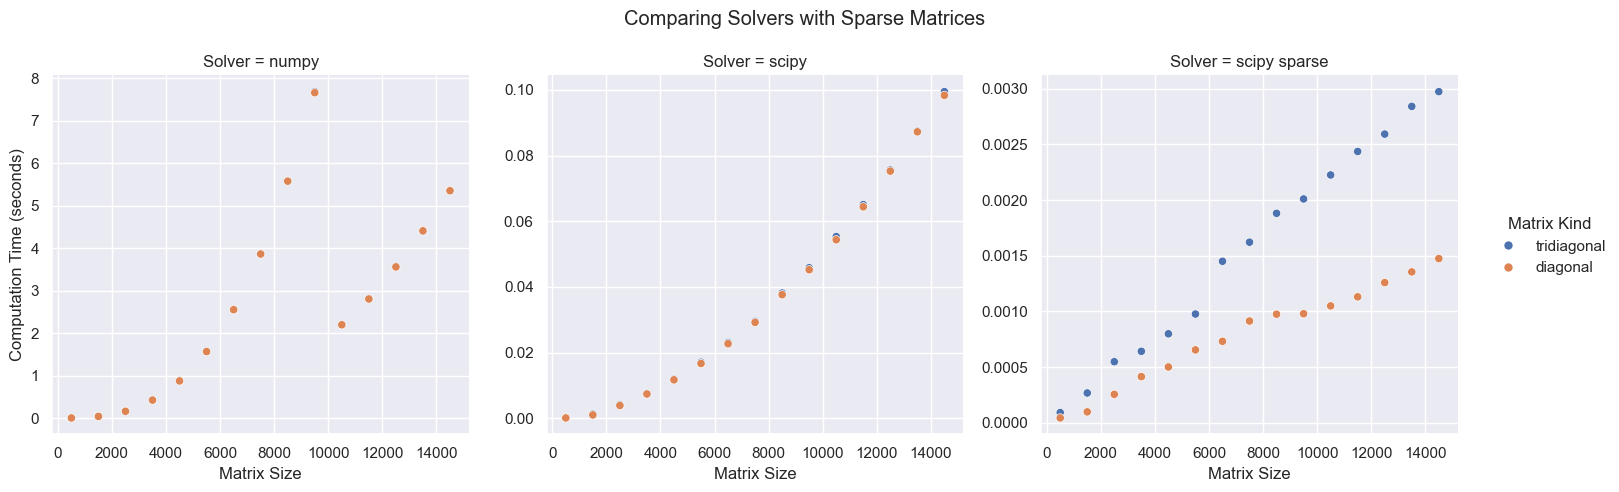

In [ ]:
trimmed_results = results[results["Matrix Kind"] != "normal"]
g = sns.relplot(data=trimmed_results, kind="scatter", x="Matrix Size", y="Computation Time (seconds)", col="Solver", hue="Matrix Kind", facet_kws={'sharey': False})
g.figure.suptitle("Comparing Solvers with Sparse Matrices")
g.tight_layout()
plt.show()

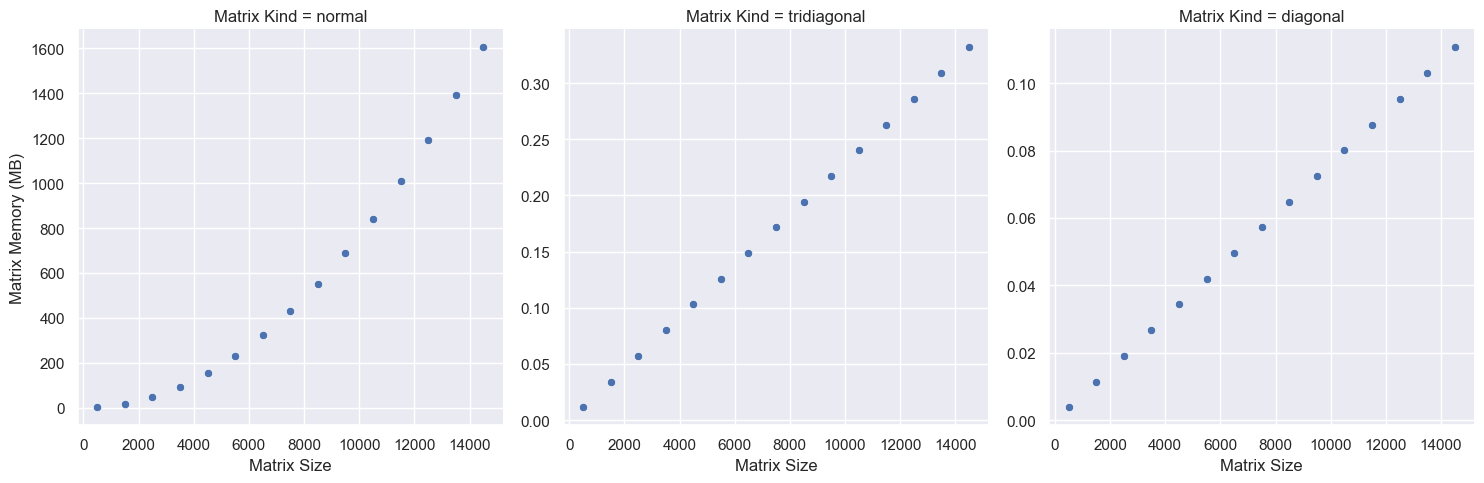

In [ ]:
g = sns.relplot(data=results, kind="scatter", x="Matrix Size", y="Matrix Memory (MB)", col="Matrix Kind", facet_kws={'sharey': False})
g.figure.suptitle("Comparing Memory of different Matrices")
plt.show()